In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('german_credit_data.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,2


In [29]:
print (df.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Class                 0
dtype: int64


In [30]:
df['Checking account'].mode()[0]

'little'

In [31]:
df['Saving accounts']=df['Saving accounts'].replace(pd.NA,df['Saving accounts'].mode()[0])
df['Checking account']=df['Checking account'].replace(pd.NA,df['Checking account'].mode()[0])


In [32]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Class               0
dtype: int64

In [41]:
label_encoder = LabelEncoder()

In [49]:
df['Sex'] = label_encoder.fit_transform(df.Sex)
df['Housing']= label_encoder.fit_transform(df.Housing)
df['Saving accounts']=label_encoder.fit_transform(df['Saving accounts'])
df['Checking account']=label_encoder.fit_transform(df['Checking account'])
df['Purpose']=label_encoder.fit_transform(df['Purpose'])

In [50]:
X= df.drop("Class", axis=1)
y= df[["Class"]]

In [65]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,2
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,2
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,3,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,2


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3,random_state=0)

In [23]:
!pip install keras

^C
ERROR: Operation cancelled by user


In [39]:
!pip install tensorflow

In [68]:
from keras.models import Sequential
from keras.layers import Dense

In [88]:
model = Sequential()
model.add(Dense(12, input_dim = 9,activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [89]:
#compile
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['Accuracy'])

In [90]:
#training a model
history=model.fit(X_train, y_train, epochs = 150, verbose =2, batch_size = 10)

Epoch 1/150
70/70 - 1s - loss: 231.8279 - Accuracy: 0.0000e+00
Epoch 2/150
70/70 - 0s - loss: 7.1847 - Accuracy: 0.3071
Epoch 3/150
70/70 - 0s - loss: -4.4935e+00 - Accuracy: 0.6943
Epoch 4/150
70/70 - 0s - loss: -1.1688e+01 - Accuracy: 0.6943
Epoch 5/150
70/70 - 0s - loss: -2.8381e+01 - Accuracy: 0.6943
Epoch 6/150
70/70 - 0s - loss: -6.6970e+01 - Accuracy: 0.6943
Epoch 7/150
70/70 - 0s - loss: -1.5184e+02 - Accuracy: 0.6943
Epoch 8/150
70/70 - 0s - loss: -3.3159e+02 - Accuracy: 0.6943
Epoch 9/150
70/70 - 0s - loss: -7.0430e+02 - Accuracy: 0.6943
Epoch 10/150
70/70 - 0s - loss: -1.4849e+03 - Accuracy: 0.6943
Epoch 11/150
70/70 - 0s - loss: -2.9537e+03 - Accuracy: 0.6943
Epoch 12/150
70/70 - 0s - loss: -5.2411e+03 - Accuracy: 0.6943
Epoch 13/150
70/70 - 0s - loss: -8.5077e+03 - Accuracy: 0.6943
Epoch 14/150
70/70 - 0s - loss: -1.2596e+04 - Accuracy: 0.6943
Epoch 15/150
70/70 - 0s - loss: -1.7725e+04 - Accuracy: 0.6943
Epoch 16/150
70/70 - 0s - loss: -2.3883e+04 - Accuracy: 0.6943
Epoch

Epoch 131/150
70/70 - 0s - loss: -1.1902e+07 - Accuracy: 0.6943
Epoch 132/150
70/70 - 0s - loss: -1.2131e+07 - Accuracy: 0.6943
Epoch 133/150
70/70 - 0s - loss: -1.2362e+07 - Accuracy: 0.6943
Epoch 134/150
70/70 - 0s - loss: -1.2594e+07 - Accuracy: 0.6943
Epoch 135/150
70/70 - 0s - loss: -1.2833e+07 - Accuracy: 0.6943
Epoch 136/150
70/70 - 0s - loss: -1.3069e+07 - Accuracy: 0.6943
Epoch 137/150
70/70 - 0s - loss: -1.3312e+07 - Accuracy: 0.6943
Epoch 138/150
70/70 - 0s - loss: -1.3552e+07 - Accuracy: 0.6943
Epoch 139/150
70/70 - 0s - loss: -1.3798e+07 - Accuracy: 0.6943
Epoch 140/150
70/70 - 0s - loss: -1.4046e+07 - Accuracy: 0.6943
Epoch 141/150
70/70 - 0s - loss: -1.4296e+07 - Accuracy: 0.6943
Epoch 142/150
70/70 - 0s - loss: -1.4548e+07 - Accuracy: 0.6943
Epoch 143/150
70/70 - 0s - loss: -1.4807e+07 - Accuracy: 0.6943
Epoch 144/150
70/70 - 0s - loss: -1.5065e+07 - Accuracy: 0.6943
Epoch 145/150
70/70 - 0s - loss: -1.5330e+07 - Accuracy: 0.6943
Epoch 146/150
70/70 - 0s - loss: -1.5594

In [91]:
from sklearn.metrics import accuracy_score

In [97]:
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis = 1)
accuracy_score(y_test,y_pred)

0.7133333333333334

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(y_test,y_pred)

array([[214,   0],
       [ 86,   0]])

In [100]:
history.history.keys()

dict_keys(['loss', 'Accuracy'])

Text(0, 0.5, 'loss')

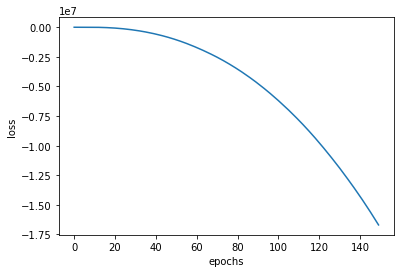

In [101]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'Accuracy')

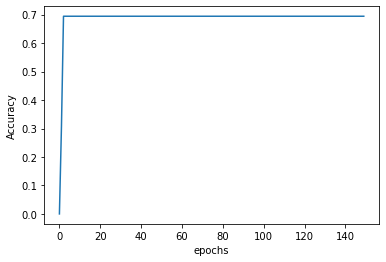

In [104]:
import matplotlib.pyplot as plt
plt.plot(history.history['Accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')